# Preliminary Data Analytic Pipeline 
Provide a coded solution for each area below.  Where appropriate show output and explanations/insights.  Make sure it runs properly.
You will need to install the libraries below if required just

!pip install < lib >
* [pandas](https://pandas.pydata.org/)  
   * [Pandas Tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) 
   * [Pandas Example](https://towardsdatascience.com/30-examples-to-master-pandas-f8a2da751fa4)
* [numpy](https://numpy.org/) 
   * [Numpy Examples](https://numpy.org/doc/stable/user/quickstart.html)
* [scikit-learn with Examples](https://scikit-learn.org/stable) 
* [ydata_profiling](https://ydata-profiling.ydata.ai/docs/master/pages/getting_started/overview.html)

In [1]:
!pip install pandas 
!pip install numpy 
!pip install scikit-learn 
!pip install basemap

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns

from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file

from IPython.display import display, HTML

# Display Properties
from IPython.display import display, HTML
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


sns.set(style="ticks", color_codes=True)

## Data Integration
Use the fraud data set introduced earlier in the course

In [3]:
# The dataset has been added to this git repository and so we will read it from the current location
df = pd.read_csv("/workspace/shared-data/transactions-1.csv")

# Printing the shape tells us the volume (rows) and dimensionality (columns) of the data
data_shape = df.shape
print(f'# The dataset has {data_shape[0]} rows and {data_shape[1]} columns')

# The dataset has 1852394 rows and 23 columns


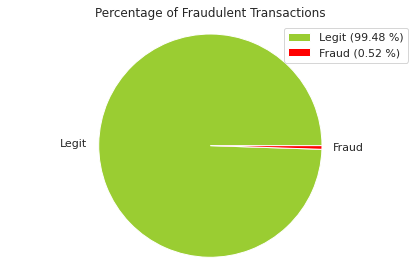

In [4]:
import matplotlib.pyplot as plt

#plt.pie(df["is_fraud"])
plt.title('Percentage of Fraudulent Transactions')
is_fraud_df = df.groupby(['is_fraud'])["is_fraud"].count()

labels = [r'Legit (99.48 %)', r'Fraud (0.52 %)']
colors = ['yellowgreen', 'red']
patches, texts = plt.pie(is_fraud_df, colors=colors,labels=["Legit","Fraud"])
plt.axis('equal')
plt.tight_layout()
plt.legend(patches, labels, loc="best")

## Format and Type
Determine the format of the file and the types of each feature. We make use of the dtypes feature of the Pandas dataframe to get the types of the columns. 

The format of the file is CSV and we can also look at a sample

In [5]:
## format and type
display(HTML(df.dtypes.to_frame().to_html()))

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,int64
merchant,object
category,object
amt,float64
first,object
last,object
sex,object
street,object


In [6]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0


## Analysis
Determine the dynamics of each feature (int/float - math stats, text - categorical or not). We have <b>11</b> numeric columns out of which <b>is_fraud</b> is our target variable and so not a feature. So in effect we have 10 numeric features and 12 textual or categorical features

In [7]:
# We will first get the statistics of all the numeric columns
math_stats = df.describe() 
display(math_stats)

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000,1852394.000
mean,926196.500,417386038393710400.000,70.064,48813.258,38.539,-90.228,88643.675,1358674218.834,38.539,-90.228,0.005
std,534740.232,1309115265318734848.000,159.254,26881.846,5.071,13.748,301487.618,18195081.388,5.106,13.760,0.072
min,0.000,60416207185.000,1.000,1257.000,20.027,-165.672,23.000,1325376018.000,19.027,-166.672,0.000
25%,463098.250,180042946491150.000,9.640,26237.000,34.669,-96.798,741.000,1343016823.750,34.740,-96.899,0.000
50%,926196.500,3521417320836166.000,47.450,48174.000,39.354,-87.477,2443.000,1357089331.000,39.369,-87.441,0.000
75%,1389294.750,4642255475285942.000,83.100,72042.000,41.940,-80.158,20328.000,1374581485.250,41.956,-80.245,0.000
max,1852393.000,4992346398065154048.000,28948.900,99921.000,66.693,-67.950,2906700.000,1388534374.000,67.510,-66.951,1.000


In [8]:
# We will first get the statistics of all the categorical columns
cat_stats = df.describe(include=[object])
display(cat_stats)

,trans_date_trans_time,merchant,category,first,last,sex,street,city,state,job,dob,trans_num
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,1819551,693,14,355,486,2,999,906,51,497,984,1852394
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9
freq,4,6262,188029,38112,40940,1014749,4392,8040,135269,13898,8044,1


In [9]:
# Let's get some unique values for some of the numeric attributes
unique_cc_num = df['cc_num'].nunique() 

# This is to see if the combination of merchant latitude longitude add up to the merchant
df["merchant_loc"] = df["merch_lat"].astype(str) + df["merch_long"].astype(str)
unique_merchant_lat_long = df['merchant_loc'].nunique() 

# This is to see if the combination of person latitude longitude add up to a person
df["person_loc"] = df["lat"].astype(str) + df["long"].astype(str)
unique_person_lat_long = df['person_loc'].nunique() 

# This is to see if we can find unique individuals using first, last, sex and date of birth
df["person"] = df["dob"].astype(str) + df["first"] + df["last"] + df["sex"] + df["job"]
unique_person = df['person'].nunique() 

# This is to get unique addresses since fraudulent transactions could be occurring from a particular address
df["address"] = df["street"] + df["city"] + df["state"] + df["zip"].astype(str)
unique_addresses = df['address'].nunique()

# Get Unique States
unique_states = df['state'].nunique()

# Get Unique Categories
unique_categories = df['category'].unique()

# Get Unique Job
unique_jobs = df['job'].nunique()

In [10]:
unique_stats = np.column_stack((unique_person, unique_cc_num, unique_addresses, 
                               unique_person_lat_long, unique_merchant_lat_long , unique_states, unique_jobs))
unique_stats_df = pd.DataFrame(unique_stats, columns = ['Unique Customers','Unique Customer Ids',
                                                        'Unique Addresses', 'Unique Customer Lat/Long',
                                                        'Unique Merchant Lat/Long','Unique States', 'Unique Jobs'])
display(HTML(unique_stats_df.to_html()))  

,Unique Customers,Unique Customer Ids,Unique Addresses,Unique Customer Lat/Long,Unique Merchant Lat/Long,Unique States,Unique Jobs
0,999,999,999,985,1852394,51,497


From the above we can conclude that there are 999 unique individuals residing at a particular address since there are also 999 addresses. Including all these 3 features might not help us in improving the accuracy of any model. So we want to eliminate some of these features

## Clean up
* Find and List number of blank entries and outliers/errors
* Take corrective actions and provide justification
* Remove unnecessary features
* If a categorical approach breakout the input features (X) from the output features (y)

In [11]:
# First let's copy the dataframe to keep a backup
df_bak = df.copy(deep=True)

# Then let's look at missing values 
display(HTML(df.isna().sum().to_frame().to_html()))

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
sex,0
street,0


In [12]:
display(HTML(df.isnull().sum().to_frame().to_html()))

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
sex,0
street,0


In [13]:
# Check if all the Date of birth values are valid dates 
all_dates_valid = pd.to_datetime(df['dob'], format='%Y-%m-%d', errors='coerce').notnull().all()

# Check that there are no illogical dates 
dob_year_values = pd.to_datetime(df['dob'], format='%Y-%m-%d', errors='coerce').dt.year.values
is_valid_year =  np.any((dob_year_values < 2019)|(dob_year_values > 1920 ))

dob_stats = np.column_stack((all_dates_valid, is_valid_year ))
dob_stats_df = pd.DataFrame(dob_stats, columns = ['Valid DOB?','Valid Year in DOB?'])
display(HTML(dob_stats_df.to_html()))  

,Valid DOB?,Valid Year in DOB?
0,True,True


If you see the above this dataset does not have any missing values. So we don't have any corrective action to take. So now let's see if we can reduce some of the features. We already can remove the following duplicate features since the information is available in some other attributes or we know the attribute is some sort of sequence generator having high cardinality that is not going to influence whether a transaction is a fraudulent one or not

<ul>
    <li>
         <b>first unnamed col: </b> This is just a sequence number for the data rows and so can be removed
    </li>
     <li>
        <b>trans_date_trans_time: </b> This is just a timestamp and is <b>duplicate</b> to <b>unix_time</b>. Also the latter is numeric be easier to use
    </li>
     <li>
        <b>trans_num: </b> This is just sequence or unique generated identifier assigned to every transaction
     </li>  
     <li>
        <b>merch_lat: </b> These have unique values when combined with merch_long and hence not likely to give us a sense of whether fraudulent transactions
     </li>  
    <li>
        <b>merch_long: </b> These have unique values when combined with merch_lat
     </li> 
</ul>

Let's do some analysis on <b>cc_num</b> to see if we have some customers that are more susceptible to fraud. 

In [14]:
cc_num_counts = df.groupby(['cc_num','is_fraud'])['is_fraud'].count() 
display(HTML(cc_num_counts.to_frame().to_html()))

In [15]:
from datetime import datetime, date 

# Let's convert transaction date and time and dob to date-time
df["dob_dt"] = pd.to_datetime(df['dob'], format='%Y-%m-%d', errors='coerce')
df["txn_dt"] = pd.to_datetime(df['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Compute weekday from transaction date
df['txn_weekday'] = df['txn_dt'].dt.day_name()

# This function converts given date to age 
def age(born): 
    born = datetime.strptime(born, "%Y-%m-%d").date() 
    today = date.today() 
    return today.year - born.year - ((today.month,  today.day) < (born.month,  born.day)) 

# Compute age from date of birth 
df['age'] = df['dob'].apply(age) 

# Compute hour from transaction date
df['txn_hour'] = df['txn_dt'].dt.hour

# Slot the times into well known time ranges
time_ranges = [0,4,8,12,16,21,24]
part_of_day_dict = ['Late Night', 'Early Morning','Morning','Afternoon','Evening','Night']
df['part_of_day'] = pd.cut(df['txn_hour'], bins=time_ranges, labels=part_of_day_dict, include_lowest=True)

# Compute month from transaction date
df['txn_month'] = df['txn_dt'].dt.month_name()

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,sex,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merchant_loc,person_loc,person,address,dob_dt,txn_dt,txn_weekday,age,txn_hour,part_of_day,txn_month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.970,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.079,-81.178,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011,-82.048,0,36.011293-82.048315,36.0788-81.1781,"1988-03-09JenniferBanksFPsychologist, counselling",561 Perry CoveMoravian FallsNC28654,1988-03-09,2019-01-01 00:00:18,Tuesday,35,0,Late Night,January
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.888,-118.210,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159,-118.186,0,49.159047-118.186462,48.8878-118.2105,1978-06-21StephanieGillFSpecial educational ne...,43039 Riley Greens Suite 393OrientWA99160,1978-06-21,2019-01-01 00:00:44,Tuesday,45,0,Late Night,January
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.110,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.181,-112.262,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.151,-112.154,0,43.150704-112.154481,42.1808-112.262,1962-01-19EdwardSanchezMNature conservation of...,594 White Dale Suite 530Malad CityID83252,1962-01-19,2019-01-01 00:00:51,Tuesday,62,0,Late Night,January
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.231,-112.114,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034,-112.561,0,47.034331-112.561071,46.2306-112.1138,1967-01-12JeremyWhiteMPatent attorney,9443 Cynthia Court Apt. 038BoulderMT59632,1967-01-12,2019-01-01 00:01:16,Tuesday,57,0,Late Night,January
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.960,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.421,-79.463,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.675,-78.632,0,38.674999-78.632459,38.4207-79.4629,1986-03-28TylerGarciaMDance movement psychothe...,408 Bradley RestDoe HillVA24433,1986-03-28,2019-01-01 00:03:06,Tuesday,37,0,Late Night,January


/tmp/ipykernel_19391/4242765218.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(fraud_df['txn_weekday'], rotation=90)
/tmp/ipykernel_19391/4242765218.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(fraud_df['category'], rotation=90)


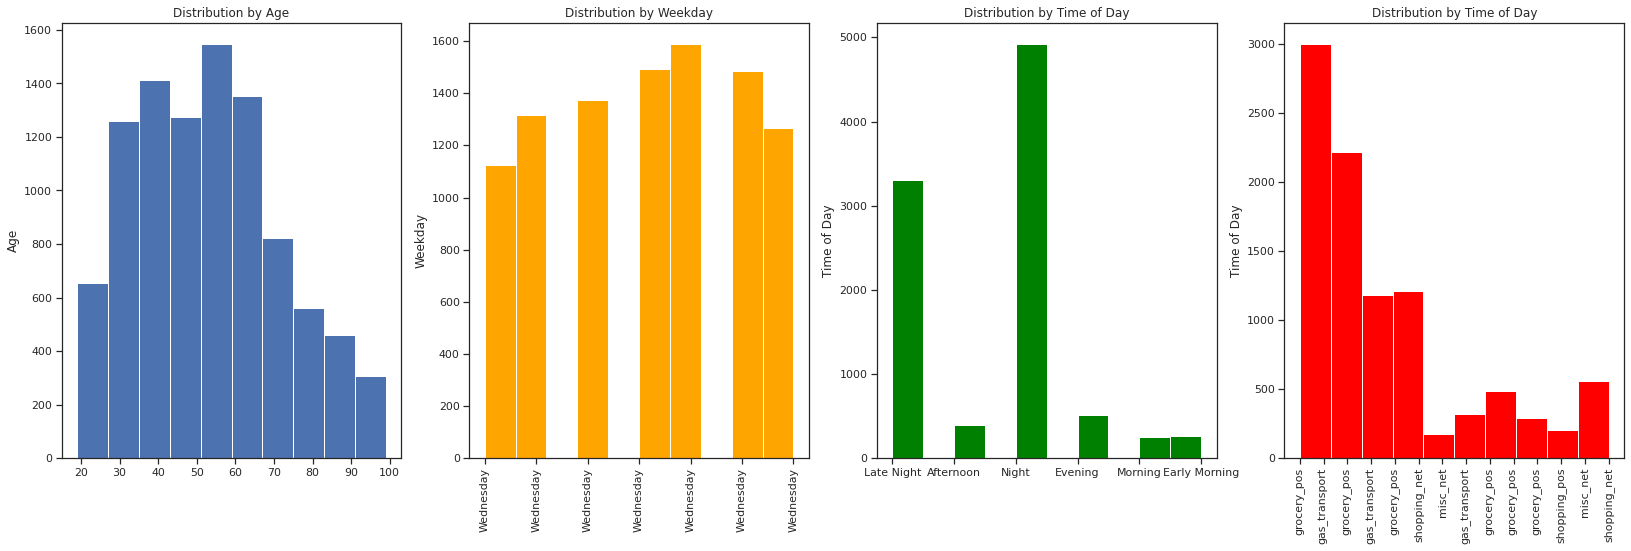

In [16]:
import matplotlib.pyplot as plt

# Get the dataframe with fraudulent transactions
fraud_df = df[df['is_fraud'] == 1] 

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 8))

ax1.hist(fraud_df['age'])
ax1.set_title('Distribution by Age')
ax1.set_ylabel('Age')

ax2.hist(fraud_df['txn_weekday'],color = "orange")
ax2.set_title('Distribution by Weekday')
ax2.set_ylabel('Weekday')
ax2.set_xticklabels(fraud_df['txn_weekday'], rotation=90)

ax3.hist(fraud_df['part_of_day'],color = "green")
ax3.set_title('Distribution by Time of Day')
ax3.set_ylabel('Time of Day')

ax4.hist(fraud_df['category'],color = "red")
ax4.set_title('Distribution by Time of Day')
ax4.set_ylabel('Time of Day')
ax4.set_xticklabels(fraud_df['category'], rotation=90)

plt.show()

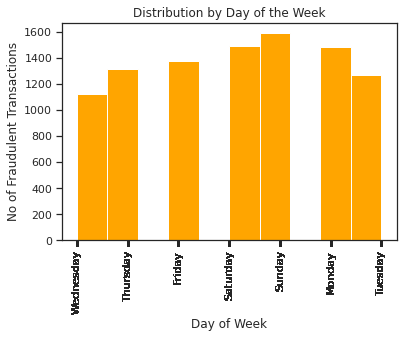

In [17]:
plt.hist(fraud_df['txn_weekday'],color = "orange")
plt.title('Distribution by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('No of Fraudulent Transactions')
plt.xticks(fraud_df['txn_weekday'], rotation=90)
plt.show()

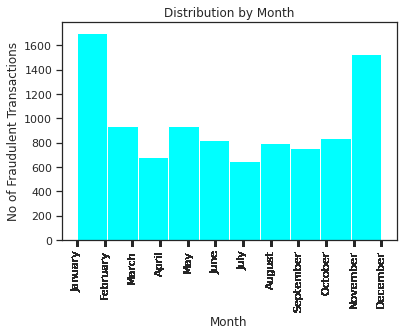

In [18]:
plt.hist(fraud_df['txn_month'],color = "cyan")
plt.title('Distribution by Month')
plt.xlabel('Month')
plt.ylabel('No of Fraudulent Transactions')
plt.xticks(fraud_df['txn_month'], rotation=90)
plt.show()

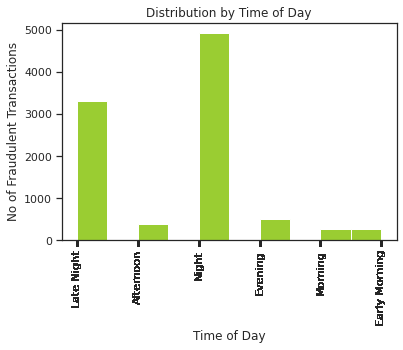

In [19]:
plt.hist(fraud_df['part_of_day'],color = "yellowgreen")
plt.title('Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('No of Fraudulent Transactions')
plt.xticks(fraud_df['part_of_day'], rotation=90)
plt.show()

In [20]:
pip install basemap-data-hires

You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


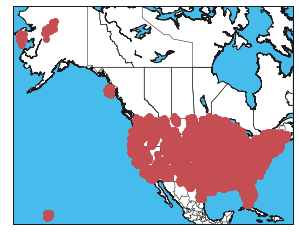

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Obtain the latitude and longitude of the merchant where the transaction occured 
lat = fraud_df['merch_lat'].values
lon = fraud_df['merch_long'].values

# determine range to print based on min, max lat and lon of the data
margin = 2 # buffer to add to the range
lat_min = min(lat) - margin
lat_max = max(lat) + margin
lon_min = min(lon) - margin
lon_max = max(lon) + margin

# create map using BASEMAP
m = Basemap(llcrnrlon=lon_min,
            llcrnrlat=lat_min,
            urcrnrlon=lon_max,
            urcrnrlat=lat_max,
            lat_0=(lat_max - lat_min)/2,
            lon_0=(lon_max-lon_min)/2,
            projection='merc',
            resolution = 'h',
            area_thresh=10000.,
            )
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color = 'white',lake_color='#46bcec')
# convert lat and lon to map projection coordinates
lons, lats = m(lon, lat)
# plot points as red dots
m.scatter(lons, lats, marker = 'o', color='r', zorder=5)
plt.show()

In [22]:
state_dict = fraud_df.groupby(['state'])['state'].count().to_dict()
state_pop_dict = fraud_df.groupby(['state'])['city_pop'].sum().to_dict()
state_final_dict = {}
for key in state_dict.keys():
    val = state_dict[key]
    pop_val = state_pop_dict[key]
    state_final_dict[key] = (val / pop_val)*10000
    

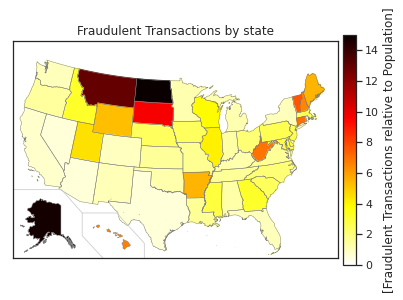

In [23]:
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

fig, ax = plt.subplots()

# Lambert Conformal map of lower 48 states.
m = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

# Mercator projection, for Alaska and Hawaii
m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
            projection='merc',lat_ts=20)  # do not change these numbers

#%% ---------   draw state boundaries  ----------------------------------------
## data from U.S Census Bureau
## http://www.census.gov/geo/www/cob/st2000.html
shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                           linewidth=0.45,color='gray')
shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

short_state_names = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

#%% -------- choose a color for each state based on population density. -------
colors={}
statenames=[]
cmap = plt.cm.hot_r # use 'reversed hot' colormap
vmin = 0; vmax = 15 # set range.
norm = Normalize(vmin=vmin, vmax=vmax)
for shapedict in m.states_info:
    statename = shapedict['NAME']
    short_name = list(short_state_names.keys())[list(short_state_names.values()).index(statename)]

    # skip DC and Puerto Rico.
    if statename not in ['District of Columbia','Puerto Rico']:
        fraud_ct = state_final_dict[short_name]
        # calling colormap with value between 0 and 1 returns
        # rgba value.  Invert color range (hot colors are high
        # fraud), take sqrt root to spread out colors more.
        colors[statename] = cmap(np.sqrt((fraud_ct-vmin)/(vmax-vmin)))[:3]
    statenames.append(statename)
    
#%% ---------  cycle through state names, color each one.  --------------------
for nshape,seg in enumerate(m.states):
    # skip DC and Puerto Rico.
    if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
        color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg,facecolor=color,edgecolor=color)
        ax.add_patch(poly)

AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
AK_SCALE = 0.19  # scale down Alaska to show as a map inset
HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
    if shapedict['NAME'] in ['Alaska', 'Hawaii']:
        seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
        if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
            seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
            seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                   for x, y in seg]
            color = rgb2hex(colors[statenames[nshape]])
        poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
        ax.add_patch(poly)

ax.set_title('Fraudulent Transactions by state')

#%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
light_gray = [0.8]*3  # define light gray color RGB
x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
m_.plot(x2,y2,color=light_gray,linewidth=0.8)

#%% ---------   Show color bar  ---------------------------------------
ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                  label=r'[Fraudulent Transactions relative to Population]')

plt.show()

In [24]:
cat_num_counts = fraud_df.groupby(['category'])['category'].count().reset_index(name='count').sort_values(['count'], ascending=False) 
display(HTML(cat_num_counts.to_html()))

,category,count
4,grocery_pos,2228
11,shopping_net,2219
8,misc_net,1182
12,shopping_pos,1056
2,gas_transport,772
9,misc_pos,322
7,kids_pets,304
0,entertainment,292
10,personal_care,290
6,home,265


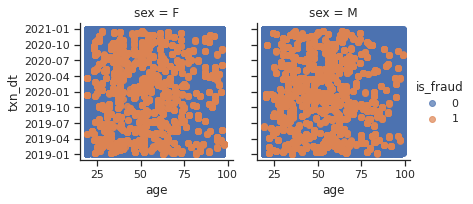

In [25]:
# This plot is to see if there are any patterns with passenger id
def plot_sex_age(_df, xyscale=None):  # xyscale to use on the plots
    g = sns.FacetGrid(_df, col='sex', hue='is_fraud')
    g.fig.set_dpi(72)
    g.map(plt.scatter, 'age', 'txn_dt', alpha=.7)
    g.add_legend()
    if xyscale is not None:
        plt.xlim(xyscale[0], xyscale[1])
        plt.ylim(xyscale[0], xyscale[1])
    plt.show()

plot_sex_age(df)

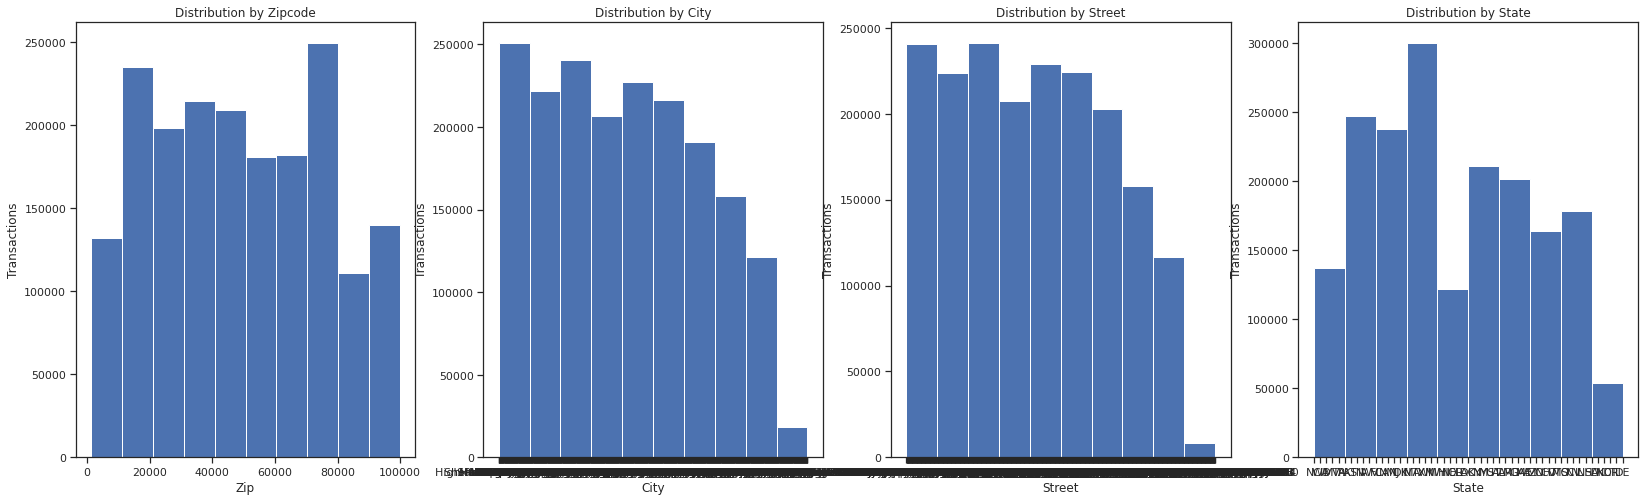

In [26]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 8))

ax1.hist(df['zip'])
ax1.set_title('Distribution by Zipcode')
ax1.set_xlabel('Zip')
ax1.set_ylabel('Transactions')

ax2.hist(df['city'])
ax2.set_title('Distribution by City')
ax2.set_xlabel('City')
ax2.set_ylabel('Transactions')

ax3.hist(df['street'])
ax3.set_title('Distribution by Street')
ax3.set_xlabel('Street')
ax3.set_ylabel('Transactions')

ax4.hist(df['state'])
ax4.set_title('Distribution by State')
ax4.set_xlabel('State')
ax4.set_ylabel('Transactions')

plt.show()

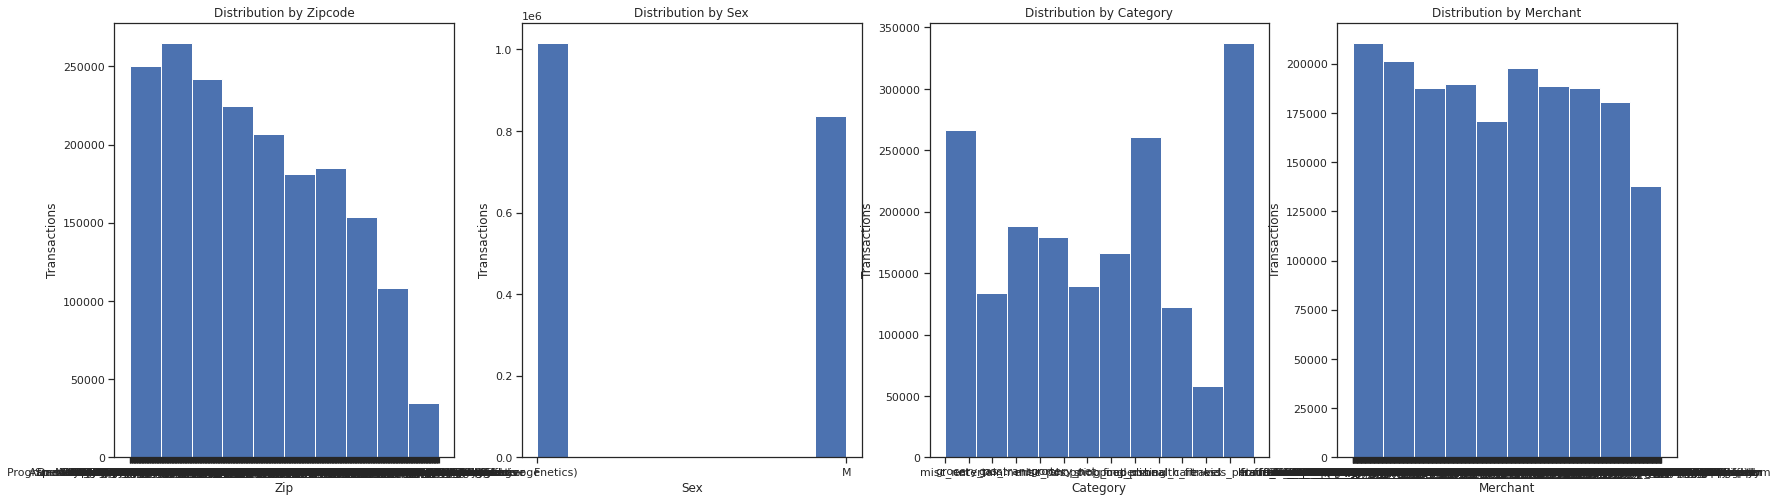

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(28, 8))

ax1.hist(df['job'])
ax1.set_title('Distribution by Zipcode')
ax1.set_xlabel('Zip')
ax1.set_ylabel('Transactions')

ax2.hist(df['sex'])
ax2.set_title('Distribution by Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Transactions')

ax4.hist(df['merchant'])
ax4.set_title('Distribution by Merchant')
ax4.set_xlabel('Merchant')
ax4.set_ylabel('Transactions')

ax3.hist(df['category'])
ax3.set_title('Distribution by Category')
ax3.set_xlabel('Category')
ax3.set_ylabel('Transactions')

plt.show()

In [28]:
sex_counts = df.groupby(['sex','is_fraud'])['is_fraud'].count() 
display(HTML(sex_counts.to_frame().to_html()))

In [29]:
city_counts = df.groupby(['city','is_fraud'])['is_fraud'].count() 
display(HTML(city_counts.to_frame().to_html()))

In [30]:
address_counts = df.groupby(['address','is_fraud'])['is_fraud'].count() 
display(HTML(address_counts.to_frame().to_html()))

In [31]:
job_counts = df.groupby(['job','is_fraud'])['is_fraud'].count() 
display(HTML(job_counts.to_frame().to_html()))

From the above analysis we see that fraudulent transactions are spread across customers and since the customer's atributes (first, last, dob, sex, job) are part of their identity these are also not likely to have any impact. Additionally from the unique counts above, we can conclude that there are 999 unique individuals residing at a particular address since there are also 999 addresses. Including both of these features might not help us in improving the accuracy of any model. So we can pick one set and drop the rest. So with this we will drop the following attributes and simply keep the <b>address</b>

<ul>
    <li>
        <b>first</b> 
    </li>
    <li>
        <b>last</b> 
    </li>
    <li>
        <b>sex</b> 
    </li>
    <li>
        <b>dob</b> 
    </li>
    <li>
        <b>person</b> 
    </li>
    <li>
        <b>street</b> 
    </li>
    <li>
        <b>city</b> 
    </li>
    <li>
        <b>state</b> 
    </li>
    <li>
        <b>zip</b> 
    </li>
</ul>

In [32]:
# Drop the above columns
cols_to_drop = ['cc_num','person','first','last','dob','sex','street','city','state','zip','person_loc',
                'merchant_loc','lat','long','trans_num','trans_date_trans_time','unix_time',
                'dob_dt','txn_dt','txn_hour','address']
trimmed_df = df.drop(columns=cols_to_drop,errors='ignore')

# Drop the column with the serial number
for col in trimmed_df.columns:
    idx = df.columns.get_loc(col)
    if idx == 0:
        trimmed_df = trimmed_df.drop(columns=df.columns[idx])
    
trimmed_df.head()

,merchant,category,amt,city_pop,job,merch_lat,merch_long,is_fraud,txn_weekday,age,part_of_day,txn_month
0,"fraud_Rippin, Kub and Mann",misc_net,4.970,3495,"Psychologist, counselling",36.011,-82.048,0,Tuesday,35,Late Night,January
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,149,Special educational needs teacher,49.159,-118.186,0,Tuesday,45,Late Night,January
2,fraud_Lind-Buckridge,entertainment,220.110,4154,Nature conservation officer,43.151,-112.154,0,Tuesday,62,Late Night,January
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,1939,Patent attorney,47.034,-112.561,0,Tuesday,57,Late Night,January
4,fraud_Keeling-Crist,misc_pos,41.960,99,Dance movement psychotherapist,38.675,-78.632,0,Tuesday,37,Late Night,January


## Normalize
Dont worry about text features but you must normalize the numeric features. 
* Provide rationale as to why the particular normalization feature was selected.

In [33]:
from scipy import stats

# Calculate the z-score for all our key numeric attributes
z2 = np.abs(stats.zscore(df['amt']))
z3 = np.abs(stats.zscore(df['city_pop']))

# Identify outlier percentages for all of these
threshold = 3

outliers2 = df[z2 > threshold]
outliers3 = df[z3 > threshold]

print((len(outliers2)/len(df))*100)
print((len(outliers3)/len(df))*100)

0.963401954443817
2.529699405202133


From the above the outlier percentages are relatively small for all columns hence for all of these MinMaxNormalization which puts the normalized value within the [0,1] range is a good choice. 

In [34]:
# Normalize the numeric features
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

trimmed_df[['normalized_amt']] = min_max_scaler.fit_transform(trimmed_df[['amt']])
trimmed_df[['normalized_city_pop']] = min_max_scaler.fit_transform(trimmed_df[['city_pop']])
trimmed_df[['normalized_age']] = min_max_scaler.fit_transform(trimmed_df[['age']])

trimmed_df.head()

,merchant,category,amt,city_pop,job,merch_lat,merch_long,is_fraud,txn_weekday,age,part_of_day,txn_month,normalized_amt,normalized_city_pop,normalized_age
0,"fraud_Rippin, Kub and Mann",misc_net,4.970,3495,"Psychologist, counselling",36.011,-82.048,0,Tuesday,35,Late Night,January,0.000,0.001,0.200
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230,149,Special educational needs teacher,49.159,-118.186,0,Tuesday,45,Late Night,January,0.004,0.000,0.325
2,fraud_Lind-Buckridge,entertainment,220.110,4154,Nature conservation officer,43.151,-112.154,0,Tuesday,62,Late Night,January,0.008,0.001,0.537
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000,1939,Patent attorney,47.034,-112.561,0,Tuesday,57,Late Night,January,0.002,0.001,0.475
4,fraud_Keeling-Crist,misc_pos,41.960,99,Dance movement psychotherapist,38.675,-78.632,0,Tuesday,37,Late Night,January,0.001,0.000,0.225


Since we have the normalized values we can now drop the original columns where we have taken normalized values

In [35]:
cols_to_drop = ['amt','city_pop','age']
trimmed_df = trimmed_df.drop(columns=cols_to_drop,errors='ignore')
trimmed_df.head()

,merchant,category,job,merch_lat,merch_long,is_fraud,txn_weekday,part_of_day,txn_month,normalized_amt,normalized_city_pop,normalized_age
0,"fraud_Rippin, Kub and Mann",misc_net,"Psychologist, counselling",36.011,-82.048,0,Tuesday,Late Night,January,0.000,0.001,0.200
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Special educational needs teacher,49.159,-118.186,0,Tuesday,Late Night,January,0.004,0.000,0.325
2,fraud_Lind-Buckridge,entertainment,Nature conservation officer,43.151,-112.154,0,Tuesday,Late Night,January,0.008,0.001,0.537
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Patent attorney,47.034,-112.561,0,Tuesday,Late Night,January,0.002,0.001,0.475
4,fraud_Keeling-Crist,misc_pos,Dance movement psychotherapist,38.675,-78.632,0,Tuesday,Late Night,January,0.001,0.000,0.225


While the problem does not ask for it at the moment since ML algorithms want numeric data we will also convert the text data from above into numeric values. Since the max values for any of these columns is 999 (for address) we will use label 

In [36]:
# Perform the transformation on a copy of the dataframe
numeric_df = trimmed_df[['normalized_amt','normalized_city_pop','normalized_age','merch_lat','merch_long']].copy()
numeric_df[['normalized_merch_lat','normalized_merch_long']] = min_max_scaler.fit_transform(trimmed_df[['merch_lat','merch_long']])
cols_to_drop = ['merch_lat','merch_long']
numeric_df = numeric_df.drop(columns=cols_to_drop,errors='ignore')
numeric_df.head()

,normalized_amt,normalized_city_pop,normalized_age,normalized_merch_lat,normalized_merch_long
0,0.000,0.001,0.200,0.350,0.849
1,0.004,0.000,0.325,0.621,0.486
2,0.008,0.001,0.537,0.498,0.547
3,0.002,0.001,0.475,0.578,0.543
4,0.001,0.000,0.225,0.405,0.883


In [37]:
class_df = trimmed_df[['is_fraud']].copy()
categorical_df = trimmed_df[['merchant','category','job','txn_weekday','txn_month','part_of_day']].copy()
categorical_df.head()

,merchant,category,job,txn_weekday,txn_month,part_of_day
0,"fraud_Rippin, Kub and Mann",misc_net,"Psychologist, counselling",Tuesday,January,Late Night
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Special educational needs teacher,Tuesday,January,Late Night
2,fraud_Lind-Buckridge,entertainment,Nature conservation officer,Tuesday,January,Late Night
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Patent attorney,Tuesday,January,Late Night
4,fraud_Keeling-Crist,misc_pos,Dance movement psychotherapist,Tuesday,January,Late Night


In [38]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to category
ohc_category = OneHotEncoder()
ohe_category= ohc_category.fit_transform(categorical_df['txn_weekday'].values.reshape(-1,1)).toarray()
df_category = pd.DataFrame(ohe_category, columns = ohc_category.categories_[0])
df_category.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [39]:
# Apply one-hot encoder to Weekday
ohc_weekday = OneHotEncoder()
ohe_weekday = ohc_weekday.fit_transform(categorical_df['txn_weekday'].values.reshape(-1,1)).toarray()
df_weekday = pd.DataFrame(ohe_weekday, columns = ohc_weekday.categories_[0])
df_weekday.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0.000,0.000,0.000,0.000,0.000,1.000,0.000
2,0.000,0.000,0.000,0.000,0.000,1.000,0.000
3,0.000,0.000,0.000,0.000,0.000,1.000,0.000
4,0.000,0.000,0.000,0.000,0.000,1.000,0.000


In [40]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data starting with category
ohc_category = OneHotEncoder()
ohe_category = ohc_category.fit_transform(categorical_df['category'].values.reshape(-1,1)).toarray()
df_category = pd.DataFrame(ohe_category, columns = ohc_category.categories_[0])
df_category.head()

,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000


In [41]:
# Apply one-hot encoder to Month 
ohc_month = OneHotEncoder()
ohe_month = ohc_month.fit_transform(categorical_df['txn_month'].values.reshape(-1,1)).toarray()
df_month = pd.DataFrame(ohe_month, columns = ohc_month.categories_[0])
df_month.head()

,April,August,December,February,January,July,June,March,May,November,October,September
0,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [42]:
from sklearn.preprocessing import OrdinalEncoder

# Fix the order for body types
ordered_part_of_day = ['Late Night','Early Morning', 'Morning','Afternoon','Evening','Night']

# Create the Ordinal Encoder
oe = OrdinalEncoder(categories=[ordered_part_of_day])

part_of_day_df = categorical_df[['part_of_day']].copy()
part_of_day_df[['part_of_day']] = oe.fit_transform(part_of_day_df[['part_of_day']])
part_of_day_df.head()

,part_of_day
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000


In [43]:
from sklearn.preprocessing import LabelEncoder

# Create instance of labelencoder
labelencoder = LabelEncoder()

merchant_job_df = categorical_df[['merchant','job']].copy()
merchant_job_df['merchant_enc'] = labelencoder.fit_transform(merchant_job_df['merchant'])
merchant_job_df['job_enc'] = labelencoder.fit_transform(merchant_job_df['job'])

cols_to_drop = ['merchant','job']
merchant_job_df = merchant_job_df.drop(columns=cols_to_drop,errors='ignore')
merchant_job_df.head()

,merchant_enc,job_enc
0,514,372
1,241,431
2,390,308
3,360,330
4,297,116


## Feature and Label Selection
Down select from your data, the input features and label(s)

In [44]:
# Concatenate all the dataframes
fraud_features_df = pd.concat([merchant_job_df, df_category, df_weekday, df_month, part_of_day_df, numeric_df], axis=1)
fraud_features_df.head()

,merchant_enc,job_enc,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,April,August,December,February,January,July,June,March,May,November,October,September,part_of_day,normalized_amt,normalized_city_pop,normalized_age,normalized_merch_lat,normalized_merch_long
0,514,372,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.200,0.350,0.849
1,241,431,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.004,0.000,0.325,0.621,0.486
2,390,308,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.008,0.001,0.537,0.498,0.547
3,360,330,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.002,0.001,0.475,0.578,0.543
4,297,116,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.225,0.405,0.883


In [45]:
# With the above we now have our key features which is all columns minus is_fraud and this will be X 
X = fraud_features_df.values
y = class_df.values

print(X.shape)
print(y.shape)

(1852394, 41)
(1852394, 1)


## Split into 3 data sets for training, validation, and test (Explain your % for each)

We are going to make use of train_test_split twice to get the Training, Validation and Test Datasets. The default values for this function is 75% training and 25% Testing. We will go with 80 and 20 instead just because we need a larger percentage in training since we will split it further to get our validation. 

We will also use stratified=y because this dataset is highly unbalanced i.e. the fraudulent transactions are small percentage of the overall transactions and hence we want to make sure that proporition is maintained in each of our splits

In [46]:
# Split
from sklearn.model_selection import train_test_split

# Get the range 
x_ids = list(range(len(X)))

# Obtain training and test dataset 
x_train_ids, x_test_ids, y_train, y_test = train_test_split(x_ids, y , test_size = 0.7, stratify=y, random_state=0)

# Obtain training and validation dataset
x_train_ids, x_val_ids, y_train, y_val = train_test_split(x_train_ids, y_train , test_size = 0.5, stratify=y_train, random_state=0)


In [47]:
# We now extract using the indices
X_train = X[x_train_ids]
X_val = X[x_val_ids]

In [48]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

pipe_lr = make_pipeline(RandomForestClassifier(max_depth=5, n_estimators=100, max_features=41, random_state=42))
pipe_lr.fit(X_train, y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('randomforestclassifier',
                 RandomForestClassifier(max_depth=5, max_features=41,
                                        random_state=42))])

In [49]:
y_pred = pipe_lr.predict(X_val)
tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()

#Store the depth for the best value
precision       = [precision_score(y_val, y_pred)]
recall          = [recall_score(y_val, y_pred)]
f1              = [f1_score(y_val, y_pred)]
roc_auc         = [roc_auc_score(y_val, y_pred)]
acc             = [pipe_lr.score(X_val, y_val)]

In [52]:
model_stats = np.column_stack((acc, f1, roc_auc, precision, recall))
model_stats_df = pd.DataFrame(model_stats, columns = ['Accuracy','F1 Score',
                                                        'ROC AUC Score', 'Precision', 'Recall'])
display(HTML(model_stats_df.to_html()))  

,Accuracy,F1 Score,ROC AUC Score,Precision,Recall
0,0.998,0.728,0.809,0.885,0.619


# Summary & Quality Check

Overall this data had sufficient information in terms of number of customers, geographical spread, types of merchants & categories and proportion of fraudulent data vs valid data across all these dimensions. The data had extremely good quality and hence it is good for machine learning ingestion. Using stratified split of training, validation and test data we are able to get a 60, 20 & 20 split for training, validation and testing maintaining the 0.52% ratio of fraudulent transactions. 

<ul>
     <li>
         <b>Overall Quality of the data: </b> None of the columns had any missing or null values. The dates in Date of Birth were valid. Statistically the States and Zip codes are also valid. So overall the quality of the data is good
    </li>
    <li>
         <b>Sufficient amount of the data: </b> There are 1.85M records and so there is sufficient amount of data in terms of rows
    </li>
    <li>
         <b>Spareness of any data categories (eg. no young adults): </b> This a very unbalanced dataset when looked at from a target variable stand point. There are only 0.5% fraudulent transactions. Having said that this is function of the domain i.e. in general the fraudulent transactions form a small percentage of the overall transactions and so it is not uncommon to see this. Within this data we see a good distribution of data amongst geos (states, zip codes, etc), customers, merchants and categories. We use the histograms to arrive at this conclusion. 
    </li>
    <li>
         <b>Trustworthiness of the data (Is it true?): </b> This is something we cannot verify and hence the biggest cons of this data. Given that the data has no missing values, does not have any outliers makes this suspect - it is likely that this is synthentic data. Real world data often has missing values, outliers, skewed distributions, etc 
    </li>
    <li>
         <b>Timeliness of the data (is it recent?)  What might be the problem if it is not?: </b> Given we are in 2024 this data is now a bit dated since it covers period between 2019 and 2020. Fraudulent actors are constantly changing how they commit fraud and so if we base our model on dated data we are not going to see it work well in the field. 
    </li>
    <li>
         <b>Note difficenties: </b> There were duplicate pieces of information such as transaction date time as well as unix timestamps as well as customer identification number and the pieces of information that can identify a customer uniquely. 
    </li>
    <li>
         <b>Available document on the data types, how the data was collected, how it was verified?: </b> The data was obtained from the Assignment Module 2 Content https://jhu.instructure.com/courses/66217/pages/case-study-transaction-fraud-detection?module_item_id=3574620. The description of the fields here was well explained and enabled removing redundant pieces of information. The only challenge is understanding which features (after removing rendundant columns) are still likely to be relevant. For example are elements of a customer's identity (E.g. Sex, DOB, Job), Address (Zip, State, City, Street), Where the transaction occured at the merchant (Lat, Long) might be influencing the chances of the transaction being fraudulent
    </li>
</ul>
